In [285]:
# all imports
from IPython.display import HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

init_notebook_mode(connected=True)

# sharper plots
%config InlineBackend.figure_format = 'retina'

## Data summon into One main file (not to touch)

In [3]:
def scalar(data) : 
    """
    Note the scalar between Price Charged and Cost of Trip
    """
    charge = np.array(data["Price Charged"])
    cost = np.array(data["Cost of Trip"])
    
    lr = []
    
    for i in range(len(data)) : 
        lr.append(charge[i] - cost[i])
        
    return lr

In [4]:
df_cab.drop(
labels = "Date of Travel", 
axis = 1, 
inplace = True)
df_cab # Date of Travel removed

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [94]:
list_of_transaction = []

transaction_id = df_ID["Transaction ID"]
transaction_cab = df_cab["Transaction ID"]

def nan(i) : 
    return np.isnan(i)

less = transaction_id - transaction_cab
for i in range(len(less)) : 
    if nan(less[i]) : 
        list_of_transaction.append(i)
        
for j in list_of_transaction : 
    df_ID.drop(
    labels = j,
    axis = 0,
    inplace = True
    )

In [119]:
customer2 = df_customer["Customer ID"]
customer_id = df_ID["Customer ID"]

index = customer_id - customer2

list_of_customer = []
for i in range(len(index)) : 
    if nan(index[i]) : 
        list_of_customer.append(i)
        
for j in list_of_customer : 
    df_ID.drop(
    labels = j,
    axis = 0,
    inplace = True
    )

In [139]:
def zero(x) : 
    return x != 0.0

In [141]:
main_list = []
customer_sub_2 = df_customer["Customer ID"]
customer_sub_id = df_ID["Customer ID"]

index_sub = customer_sub_2 - customer_sub_id
for i in range(len(index_sub)) : 
    if zero(index_sub[i]) : 
        main_list.append(i)
        
for j in main_list : 
    df_ID.drop(
    labels = j,
    axis = 0,
    inplace = True
    )
    
    df_customer.drop(
    labels = j,
    axis = 0,
    inplace = True
    )

In [148]:
df_second_transaction = df_ID["Transaction ID"]
df_second_cab_trans = df_cab["Transaction ID"]

sub_list = []
index_second = df_second_transaction - df_second_cab_trans
for i in range(len(index_second)) : 
    if zero(index_second[i]) :
        sub_list.append(i)
        
for j in sub_list : 
    df_cab.drop(
    labels = j,
    axis = 0,
    inplace = True
    )

# Data Processing

### Data united database

In [172]:
# Build a DataFrame
mainCustomer = pd.read_csv("mainCustomerfile.csv")
mainID = pd.read_csv("shortenIDfile.csv")
mainCab = pd.read_csv("mainFile.csv")

# Clean created data
mainCustomer.drop(
    labels = "Unnamed: 0",
    axis = 1,
    inplace = True
)
mainID.drop(
    labels = "Unnamed: 0",
    axis = 1,
    inplace = True
)
mainCab.drop(
    labels = "Unnamed: 0",
    axis = 1,
    inplace = True
)

# DataFrame creation
main = pd.DataFrame({
    "Company" : mainCab["Company"],
    "City" : mainCab["City"],
    "KM Travelled" : mainCab["KM Travelled"],
    "Price Charged" : mainCab["Price Charged"],
    "Cost of Trip" : mainCab["Cost of Trip"],
    "Transaction ID" : mainCab["Transaction ID"],
    "Customer ID" : mainID["Customer ID"], 
    "Gender" : mainCustomer["Gender"], 
    "Age" : mainCustomer["Age"],
    "Payment Mode" : mainID["Payment_Mode"],
    "Income (USD/Month)" :mainCustomer["Income (USD/Month)"] 
})

In [153]:
# All data base
df_cab = pd.read_csv("DataSet/Cab_Data.csv")
df_city = pd.read_csv("DataSet/City.csv")
df_customer = pd.read_csv("DataSet/Customer_ID.csv")
df_ID = pd.read_csv("DataSet/Transaction_ID.csv")

In [189]:
df = pd.read_csv("mainEDA.csv")
df.drop(
    labels = "Unnamed: 0",
    axis = 1,
    inplace = True
)
# Comment
    # As we can see from the united database, the transaction ID and the customer ID only remains the same in the Pink Cab company, which travelers are 100% male

In [284]:
df.head()

,Company,City,KM Travelled,Price Charged,Cost of Trip,Transaction ID,Customer ID,Gender,Age,Payment Mode,Income (USD/Month)
0,Pink Cab,ATLANTA GA,30.45,370.95,313.635,10000011,29290,Male,28,Card,10813
1,Pink Cab,ATLANTA GA,28.62,358.52,334.854,10000012,27703,Male,27,Card,9237
2,Pink Cab,ATLANTA GA,9.04,125.20,97.632,10000013,28712,Male,53,Cash,11242
3,Pink Cab,ATLANTA GA,33.17,377.40,351.602,10000014,28020,Male,23,Cash,23327
4,Pink Cab,ATLANTA GA,8.73,114.62,97.776,10000015,27182,Male,33,Card,8536


A few information

KM Traveled

In [286]:
print("Maximum KM Traveled :", df["KM Travelled"].max())
print("Minimum KM Traveled :", df["KM Travelled"].min())
print("Mean KM Traveled :", df["KM Travelled"].mean())
print("Median KM Traveled :", np.median(df["KM Travelled"]))

Maximum KM Traveled : 44.0
Minimum KM Traveled : 1.96
Mean KM Traveled : 22.47028571428572
Median KM Traveled : 23.2


Price Charged

In [288]:
print("Maximum Price Charged :", df["Price Charged"].max())
print("Minimum Price Charged :", df["Price Charged"].min())
print("Mean Price Charged :", df["Price Charged"].mean())
print("Median Price Charged :", np.median(df["Price Charged"]))

Maximum Price Charged : 646.06
Minimum Price Charged : 27.71
Mean Price Charged : 314.6351428571429
Median Price Charged : 324.21


Cost of Trip

In [289]:
print("Maximum Cost of Trip :", df["Cost of Trip"].max())
print("Minimum Cost of Trip :", df["Cost of Trip"].min())
print("Mean Cost of Trip :", df["Cost of Trip"].mean())
print("Median Cost of Trip :", np.median(df["Cost of Trip"]))

Maximum Cost of Trip : 482.04
Minimum Cost of Trip : 20.776
Mean Cost of Trip : 250.0662285714286
Median Cost of Trip : 259.74


Income (USD/Month)

In [268]:
print("Maximum Income :", df["Income (USD/Month)"].max())
print("Minimum Income :", df["Income (USD/Month)"].min())
print("Mean Income :", df["Income (USD/Month)"].mean())

Maximum Income : 30608
Minimum Income : 2371
Mean Income : 14816.085714285715


Travelers age

In [267]:
print("Maximum Travelers Age :", df["Age"].max())
print("Minimum Travelers Age :", df["Age"].min())
print("Mean Travelers Age :", df["Age"].mean())

Maximum Travelers Age : 63
Minimum Travelers Age : 18
Mean Travelers Age : 31.514285714285716


In [222]:
city = df["City"].value_counts()
label_city = np.unique(df["City"])

Text(0, 0.5, 'Effectif')

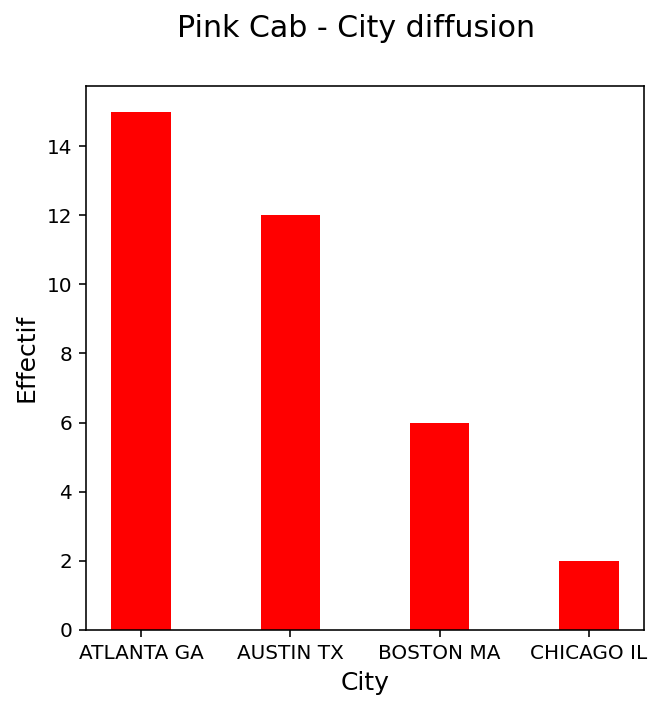

In [269]:
# Define varaibles to draw simplier
city = df["City"].value_counts()
label_city = np.unique(df["City"])

# Build a graph
fig, ax = plt.subplots()
fig.set_size_inches(5, 5, forward = True) # modify the size of the graph
fig.suptitle("Pink Cab - City diffusion", fontsize = 15)

ax.bar(range(len(city)), city, tick_label = label_city, width = .4, color = "red")
ax.set_xlabel("City", fontsize = 12.5)
ax.set_ylabel("Effectif", fontsize = 12.5)

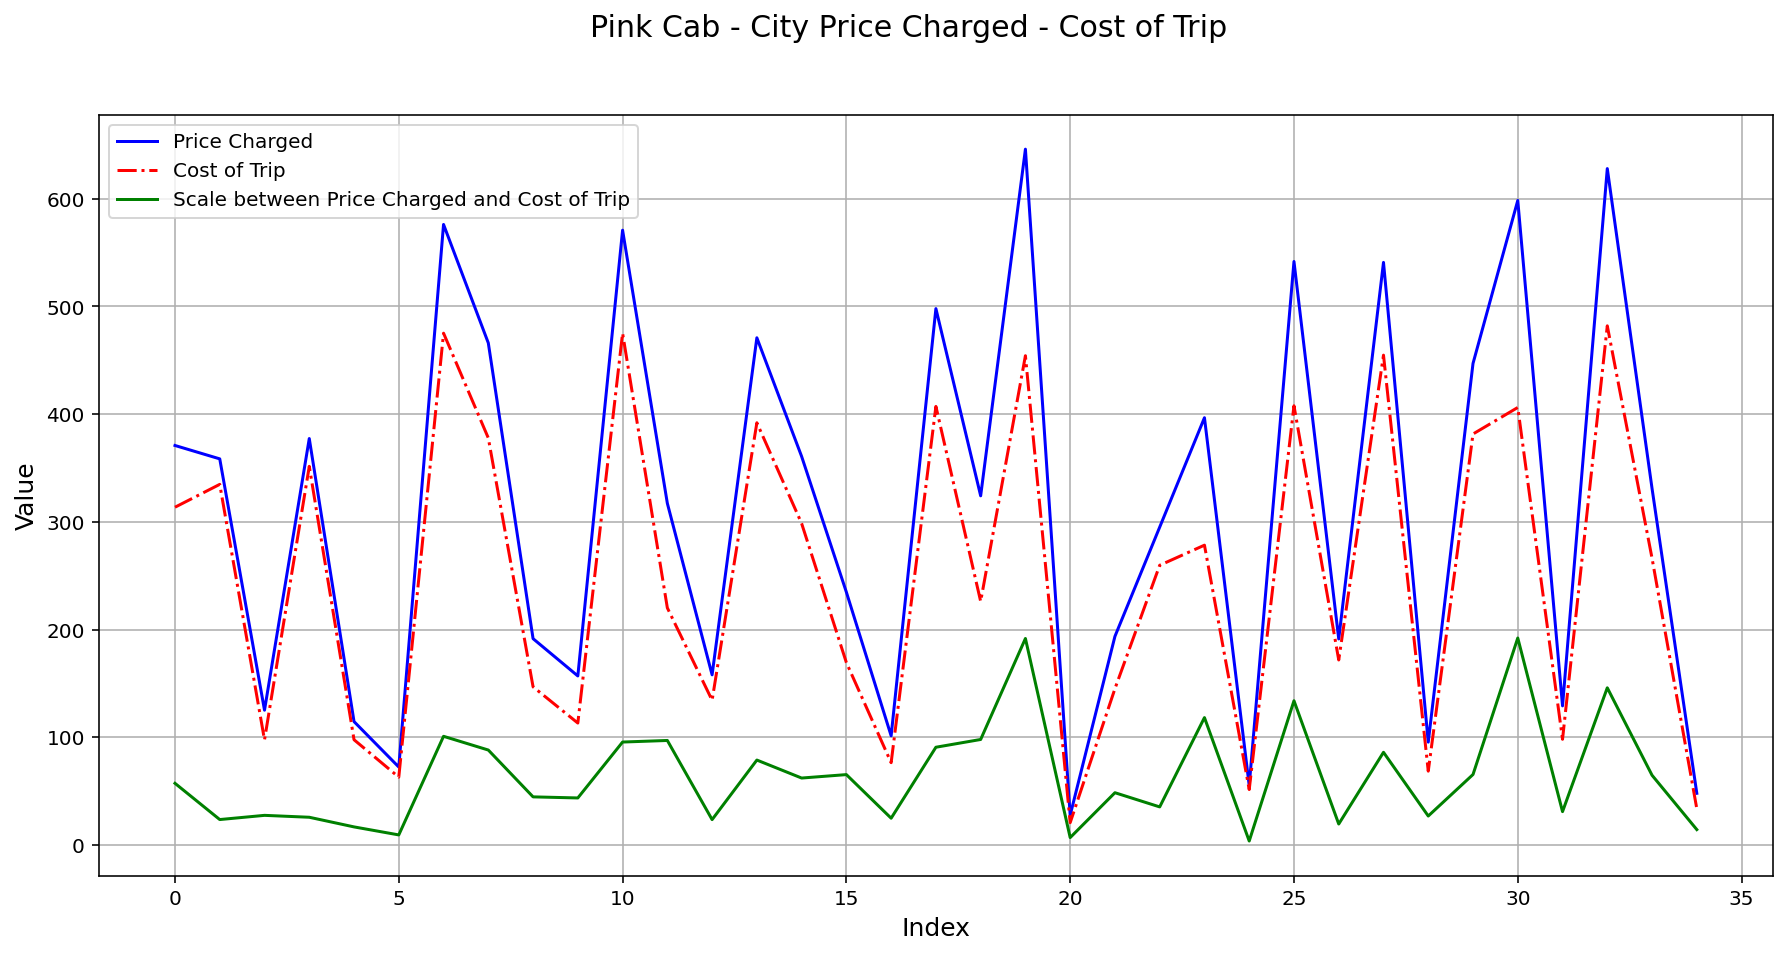

In [290]:
# Build a graph of Price Charged - Cost of Trip
fig, ax = plt.subplots()
fig.set_size_inches(15, 7, forward = True) # modify the size of the graph
fig.suptitle("Pink Cab - City Price Charged - Cost of Trip", fontsize = 15)

ax.plot(df["Price Charged"], color = "blue", linestyle = "-", label = "Price Charged")
ax.plot(df["Cost of Trip"], color = "red", linestyle = "-.", label = "Cost of Trip")
ax.plot(scalar(df), color = "green", linestyle = "-", label = "Scale between Price Charged and Cost of Trip")

ax.set_ylabel("Value", fontsize = 12.5)
ax.set_xlabel("Index", fontsize = 12.5)
ax.grid()
ax.legend()

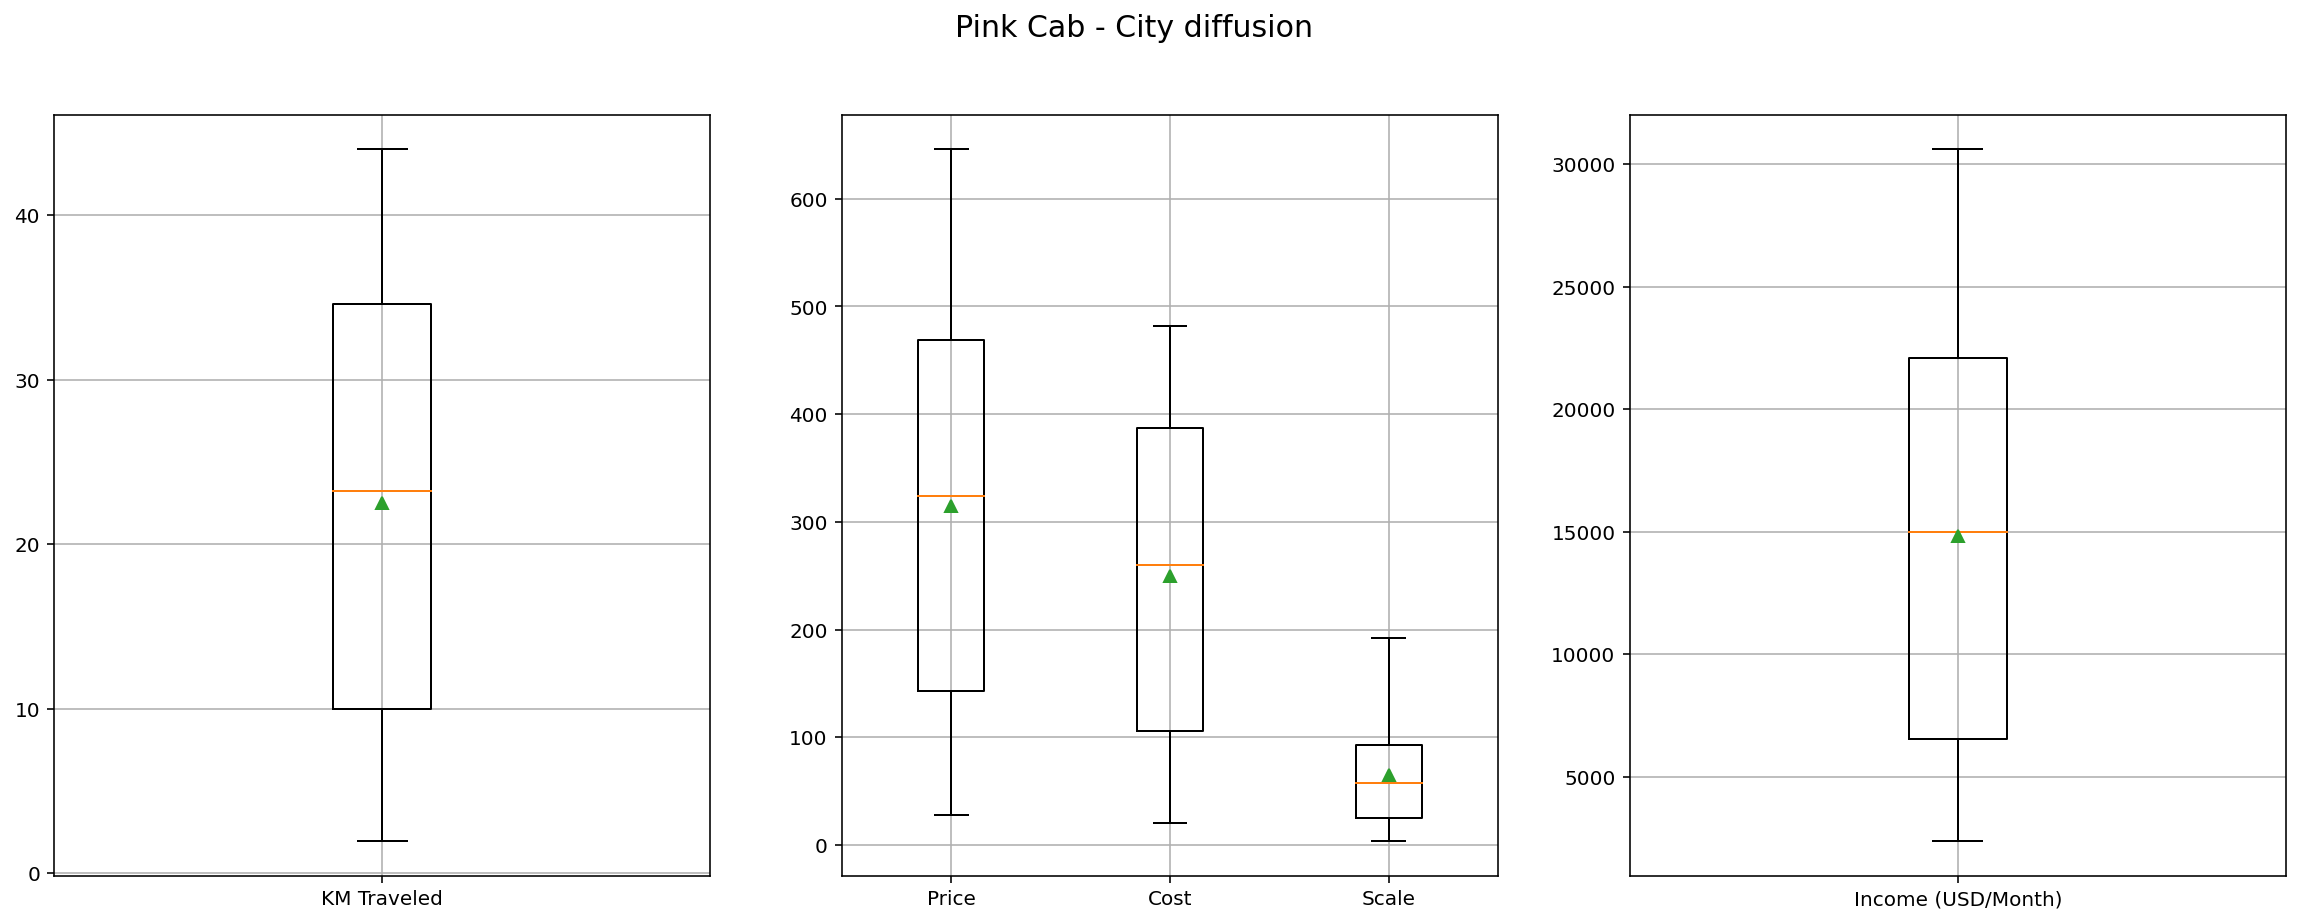

In [266]:
# Define variables
KM = df["KM Travelled"]
price_charged = df["Price Charged"]
cost_of_trip = df["Cost of Trip"]
scale = scalar(df)
income = df["Income (USD/Month)"]

# Build a graph
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(20, 7, forward = True) # modify the size of the graph
fig.suptitle("Pink Cab - City diffusion", fontsize = 15)

# First axe
ax1.boxplot(KM, showmeans = True, labels = ["KM Traveled"])
ax1.grid()

# Second axe
ax2.boxplot([price_charged, cost_of_trip, scale], showmeans = True, labels = ["Price", "Cost", "Scale"])
ax2.grid()

# Last axe
ax3.boxplot(income, showmeans = True, labels = ["Income (USD/Month)"])
ax3.grid()